In [14]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
zhfont = FontProperties(fname="/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc")
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import cmaps
sys.path.append("/home/zhouquan/MyDoc/Math_Model/2023F/Dataloader")
from data_quality_control import median_filter
from mpl_toolkits.mplot3d import Axes3D

In [12]:
df1 = pd.read_csv("/home/zhouquan/MyDoc/Math_Model/Dataset/Saved/帧数统计.csv")
print(df1[df1["num"]==204]["rain_id"])
time0to5 = df1.query("num >= 0 and num < 50") #0<= t < 5
time5to10 = df1.query("num >= 50 and num < 100")
time10to15 = df1.query("num >= 100 and num < 150")
time15to20 = df1.query("num >= 150 and num < 200")
timeover20 = df1.query("num >= 200")

i_name=["[0, 5)", "[5, 10)", "[10, 15)", "[15, 20)", "[20, Inf)"]
i_marker=['.', ',' , 'o', 'v', '$\clubsuit$']
i_color=['#c72e29', '#098154', '#fb832d', '#6950a1', '#ed1941']

fig,ax1=plt.subplots(1,1,figsize=(10,8), dpi= 1000)

ax1.scatter(time0to5.index, time0to5["num"]/10, color=i_color[0], marker=i_marker[0], label=i_name[0])
ax1.scatter(time5to10.index, time5to10["num"]/10, color=i_color[1], marker=i_marker[1], label=i_name[1])
ax1.scatter(time10to15.index, time10to15["num"]/10, color=i_color[2], marker=i_marker[2], label=i_name[2])
ax1.scatter(time15to20.index, time15to20["num"]/10, color=i_color[3], marker=i_marker[3], label=i_name[3])
ax1.scatter(timeover20.index, timeover20["num"]/10, color=i_color[4], marker=i_marker[4], label=i_name[4])
ax1.set_xlabel("Data_ID", fontproperties = zhfont)
ax1.set_ylabel(f"时间序列长度/(小时)", fontproperties = zhfont)
ax1.legend()
plt.show()

32    data_dir_032
Name: rain_id, dtype: object


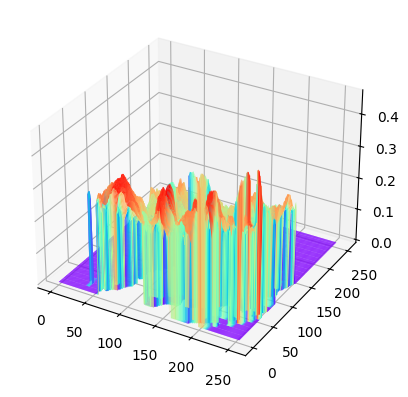

In [20]:
df_radar = pd.read_csv("/home/zhouquan/MyDoc/Math_Model/Dataset/radar_path.csv")
df_radar_32 = df_radar[df_radar["rain_id"] == "data_dir_032"]

df_rainfall = pd.read_csv("/home/zhouquan/MyDoc/Math_Model/Dataset/rainfall_path.csv")
df_rainfall_32 = df_rainfall[df_rainfall["rain_id"] == "data_dir_032"]

fig = plt.figure()
ax3 = plt.axes(projection='3d')
xx = np.arange(256)
yy = np.arange(256)
X, Y = np.meshgrid(xx, yy)
data = median_filter("/home/zhouquan/MyDoc/Math_Model/Dataset/NJU_CPOL_update2308/dBZ/7.0km/data_dir_032/frame_029.npy", "dBZ")
ax3.plot_surface(X, Y, data, cstride=1, cmap='rainbow')
#ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap='rainbow)   #等高线图，要设置offset，为Z的最小值
plt.show()


# plt.imshow(data, cmap='coolwarm', interpolation='nearest')
# plt.colorbar()
    
    